# Women scientists funding in Switzerland

---

by Joao Martins

In [1]:
# import libraries
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 6)})

# import data
grants=pd.read_feather('data/project.feather')
grants=grants.dropna(subset=['start_date'])
grants['year'] = grants['start_date'].dt.year
grantees=pd.read_feather('data/grantee.feather')
people=pd.read_feather('data/person.feather')

# main dataframe: project leaders and project employees + gender + their projects
df=(grantees
      .query('role in ["employee", "responsible_applicant"]')
      .merge(people[['person_id_snsf', 'gender']], on='person_id_snsf')
      .merge(grants, on='project_number'))
# ...
df = df.drop(['index_x', 'index_y'], axis=1)
df['gender'] = df.gender.astype(str) # for pivoting later

## Leaky pipeline for women scientists

It is well-known women are underrepresented in leadership positions.  Science is no exception: academic careers are also known for being "leaky" for women.

See also: 
1. [Leaky pipeline for women scientists dries up after they win first big grant](https://www.nature.com/articles/d41586-018-05759-w), _in Nature, 2018_
2. [A Leak in the Academic Pipeline](https://www.frontiersin.org/articles/10.3389/fpsyg.2019.01297/full), _in Frontiers, 2019_

## Swiss case: funding women scientists

Switzerland, known for its investment in R&D, the issue lead to a dedicated website: [fix-the-leaky-pipeline.ch](https://www.fix-the-leaky-pipeline.ch).

## Finding the evidence

The leading public science funding agency in Switzerland makes its data freely available:  
 - over 70k science projects, spanning across 50 years  
 - over 100k individuals involved in these projects  
 - gender information for everyone involved  

Source: [p3.snf.ch](http://p3.snf.ch/Pages/DataAndDocumentation.aspx)

In [2]:
# counts by year between 2000 and 2019
counts = (df
            .query('(year > 1999) & (year < 2020)')
            .groupby(['year', 'role', 'gender']).size()
            .reset_index().rename(columns={0:'count'}))
counts = counts.pivot_table(index=['year', 'role'], columns='gender', values='count', fill_value=0)
counts['both'] = (counts['male'] + counts['female'])
counts['percent_women'] = 100 * counts['female'] / counts['both']
counts['percent_men'] = 100 * counts['male'] / counts['both']

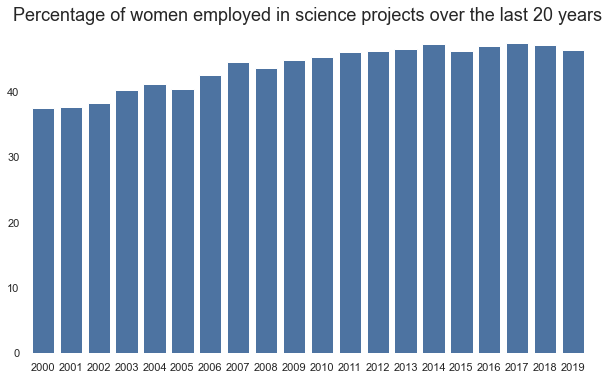

In [3]:
plt.box(on=None) 
sns.set_style("whitegrid")
g=sns.barplot(x='year', y='percent_women', color='#3f72af', data=counts.query('role == "employee"').reset_index())
g.set_xlabel('')
g.set_ylabel('')
g.set_title('Percentage of women employed in science projects over the last 20 years', fontsize = 18)
fig = g.get_figure()
fig.savefig("docs/img/plot1.svg")

## Share of women employed in science projects


![plot 1](./img/plot1.svg "Percentage of women employed in science projects")

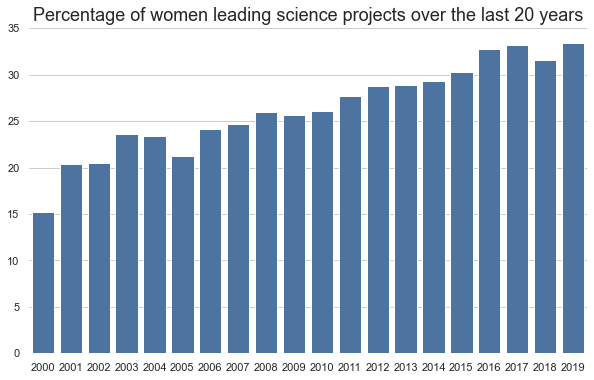

In [4]:
plt.box(on=None) 
sns.set_style("whitegrid")
g=sns.barplot(x='year', y='percent_women', color='#3f72af', data=counts.query('role == "responsible_applicant"').reset_index())
g.set_xlabel('')
g.set_ylabel('')
g.set_title('Percentage of women leading science projects over the last 20 years', fontsize = 18)
fig = g.get_figure()
fig.savefig("docs/img/plot2.svg")

## Share of women leading science projects


![plot 2](./img/plot2.svg "Percentage of women leading science projects")

In [5]:
gap_women = counts.pivot_table(index=['year'], columns='role', values='percent_women', fill_value=0)
gap_women['ratio'] = gap_women['responsible_applicant'] / gap_women['employee']
gap_men = counts.pivot_table(index=['year'], columns='role', values='percent_men', fill_value=0)
gap_men['ratio'] = gap_men['responsible_applicant'] / gap_men['employee']
gap = pd.concat([gap_women, gap_men], keys=['women', 'men'])
gap = gap.reset_index().rename(columns={'level_0':'gender'})

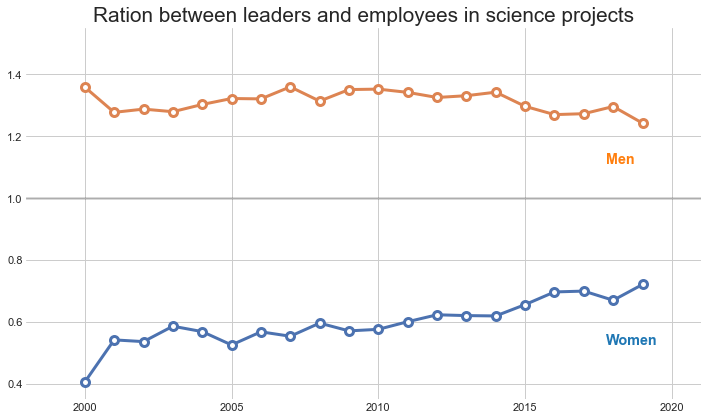

In [6]:
# custom lineplot with matplotlib
mpl.rcParams['lines.linewidth']=3
plt.rcParams['figure.figsize']=(10, 6)
plt.gcf().set_size_inches(10, 6)
plt.style.use('seaborn-whitegrid')
plt.plot(gap.query('gender=="women"').year, 
         gap.query('gender=="women"').ratio,
         '-o',
         markersize=8,
         markerfacecolor='white',
         markeredgewidth=3)
plt.plot(gap.query('gender=="men"').year, 
         gap.query('gender=="men"').ratio,
         '-o',
         markersize=8,
         markerfacecolor='white',
         markeredgewidth=3)
plt.figtext(.85, .18, 
            u'Women', ha='left', va='bottom', 
            color='#1f77b4', fontsize='large', fontweight='semibold')
plt.figtext(.85, .6, 
            u'Men', ha='left', va='bottom', 
            color='#ff7f0e', fontsize='large', fontweight='semibold')
plt.axhline(y=1, color='black', linestyle='-', linewidth=3, alpha=.15)
plt.xlim(1998, 2021)
plt.ylim(.35, 1.55)
plt.title('Ration between leaders and employees in science projects', fontsize='xx-large', fontweight='light')
plt.box(on=None)
plt.tight_layout()
plt.savefig("docs/img/plot3.svg")

## Women leadership gap

![plot 3](./img/plot3.svg "Ratio bewteen people leading and employed in science projects")

## Conclusion

> Steady improvement of the gap between the share of women leading science projects and that of women employed in science projects in Switzerland.

Further reading: [Promotion of women by the SNSF](http://www.snf.ch/en/researchinFocus/newsroom/Pages/news-181004-promotion-of-women-by-the-snsf.aspx)